# Data Cleaning
Aqui vamos realizar toda a etapa de limpeza dos dados para nossa analise de dados



# Importando bibliotecas


In [1]:
# bibliotecas
import numpy as np
import pandas as pd
import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import altair as alt


In [2]:
# importar os conjuntos de dados

# game: Reúne os registros de cada jogo no conjunto de dados
game = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game.csv")

# game_golie_stats: As estatísticas dos goleiros que participaram dos jogos
game_golie_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_goalie_stats.csv")

# game_plays: As jogadas individuais de cada jogo
#game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")
    
# game_plays_player: Os jogadores envolvidos em uma jogada
#game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")
    
# game_shifts: Detalhes a respeito dos turnos dos jogadores
#game_shifts = pd.read_csv("https://dl.dropbox.com/s/j8s06eo3osisrr0/game_shifts.csv?dl=0")

# game_skater_stats: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time
#game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

# game_teams_stats: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe
game_teams_stats = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/game_teams_stats.csv")

# player_info: Informações sobre os jogadores
player_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/player_info.csv")

# team_info: informação sobre as equipes
team_info = pd.read_csv("https://raw.githubusercontent.com/DanOliveira-DS/NHL/master/datasets/team_info.csv")

In [3]:
game.head(3)

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
team_info.head(3)

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26


In [5]:
game_teams_stats.head(3)

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7


In [6]:
player_info.head()

,player_id,firstName,lastName,nationality,birthCity,primaryPosition,birthDate,link
0,8467412,Alexei,Ponikarovsky,UKR,Kiev,LW,1980-04-09,/api/v1/people/8467412
1,8468501,Anton,Volchenkov,RUS,Moscow,D,1982-02-25,/api/v1/people/8468501
2,8459670,Kimmo,Timonen,FIN,Kuopio,D,1975-03-18,/api/v1/people/8459670
3,8471233,Travis,Zajac,CAN,Winnipeg,C,1985-05-13,/api/v1/people/8471233
4,8455710,Martin,Brodeur,CAN,Montreal,G,1972-05-06,/api/v1/people/8455710


In [7]:
game_golie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2011030221,8455710,1,3876,0,0,0,36,32,7,0,25,0,28,8,L,88.888889,87.5,89.285714
1,2011030221,8468524,4,3876,0,0,0,26,23,4,5,14,5,16,5,W,88.461538,80.0,87.500000
2,2011030222,8455710,1,3599,0,0,0,20,19,1,3,15,3,16,1,W,95.000000,100.0,93.750000
3,2011030222,8468524,4,3559,0,0,0,34,31,6,0,25,0,28,6,L,91.176471,100.0,89.285714
4,2011030223,8468524,4,4623,0,0,0,31,27,1,1,25,1,28,2,L,87.096774,50.0,89.285714


# Vamos relacionar os conjuntos de dados com suas chaves

In [8]:
# game com game_teams_stats
nhl_eda = pd.merge(game, game_teams_stats, on='game_id')

In [9]:
nhl_eda.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [10]:
# mapear id ao nome do time
team_dict = team_info.set_index('team_id')['teamName'].to_dict()
team_dict

{1: 'Devils',
 4: 'Flyers',
 26: 'Kings',
 14: 'Lightning',
 6: 'Bruins',
 3: 'Rangers',
 5: 'Penguins',
 17: 'Red Wings',
 28: 'Sharks',
 18: 'Predators',
 23: 'Canucks',
 16: 'Blackhawks',
 9: 'Senators',
 8: 'Canadiens',
 30: 'Wild',
 15: 'Capitals',
 19: 'Blues',
 24: 'Ducks',
 27: 'Coyotes',
 2: 'Islanders',
 10: 'Maple Leafs',
 13: 'Panthers',
 7: 'Sabres',
 20: 'Flames',
 21: 'Avalanche',
 25: 'Stars',
 29: 'Blue Jackets',
 52: 'Jets',
 22: 'Oilers',
 54: 'Golden Knights',
 12: 'Hurricanes',
 53: 'Coyotes',
 11: 'Thrashers'}

In [11]:
# aplicando no nosso DataFrame
nhl_eda['team_id'].replace(team_dict, inplace=True)
nhl_eda['away_team_id'].replace(team_dict, inplace=True)
nhl_eda['home_team_id'].replace(team_dict, inplace=True)

In [12]:
# excluindo colunas desnecesarias
cols_drop = ['date_time_GMT', 'outcome', 'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
             'venue_time_zone_offset', 'venue_time_zone_tz']

nhl_eda = nhl_eda.drop(labels=cols_drop, axis=1)

In [13]:
# mudando tipo da variavel date_time

for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')

In [14]:
# criando coluna resultado
nhl_eda['outcome'] = nhl_eda['won'].map({False:'Lose', True:'Win'})

# excluindo coluna redundante
nhl_eda.drop('won', axis=1, inplace=True)

In [15]:
# filtrando gols tomados e criando um dataframe orientado pelo index

team_list = nhl_eda['team_id'].unique()

series = dict()
for name in team_list:
    

    testedf = nhl_eda[nhl_eda['team_id'] == name ]

    gols_tomados_times_mandantes = testedf[(testedf['team_id'] == name ) & (testedf['HoA'] == 'away') & 
                                            (testedf['away_team_id']== name )]['home_goals']
    

    gols_tomados_times_visitantes = testedf[(testedf['HoA']=='home') & (testedf['team_id']== name) & 
                                            (testedf['home_team_id']== name)]['away_goals']
    
    testeGA = pd.concat([gols_tomados_times_mandantes, gols_tomados_times_visitantes]).to_frame(name='GA')
    
    series[name] = testeGA


    
list_teste = list()
for values in series.values():
    list_teste.append(values)
    
    
GA_teste = pd.concat(list_teste)

In [16]:
# combinando nosso conjunto de dados ao do gols tomados
nhl_eda = pd.concat([nhl_eda, GA_teste], axis=1)

# excluindo colunas redundantes
nhl_eda.drop(['away_team_id','home_team_id','away_goals', 'home_goals'], axis=1, inplace=True)

In [17]:
# reordenando e renomeando colunas
nhl_eda = nhl_eda[['game_id', 'season', 'type', 'date_time', 'team_id','goals', 'GA',
                   'HoA','settled_in','outcome', 'head_coach', 'shots', 'hits', 'pim',
                   'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage','giveaways',
                   'takeaways']].rename(columns={'team_id':'team_name',
                                                 'goals':'GF'})

In [18]:
# vamos ver como ficou no conjunto de dados
nhl_eda.shape

(22868, 19)

Obs:
* Nos Gols Tomados estao incluidos as derrotas no shoot-out, mas apenas o numero de derrotas e nao o numero de gols tomados. 

In [19]:
# golie stats vamos deixar mais visual inserindo os nomes dos jogadores e dos times
game_golie_stats.head(3)

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2011030221,8455710,1,3876,0,0,0,36,32,7,0,25,0,28,8,L,88.888889,87.5,89.285714
1,2011030221,8468524,4,3876,0,0,0,26,23,4,5,14,5,16,5,W,88.461538,80.0,87.500000
2,2011030222,8455710,1,3599,0,0,0,20,19,1,3,15,3,16,1,W,95.000000,100.0,93.750000


In [20]:
game_golie_stats['team_id'].replace(team_dict, inplace=True)

In [21]:
game_golie_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,pim,shots,saves,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,decision,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage
0,2011030221,8455710,Devils,3876,0,0,0,36,32,7,0,25,0,28,8,L,88.888889,87.5,89.285714
1,2011030221,8468524,Flyers,3876,0,0,0,26,23,4,5,14,5,16,5,W,88.461538,80.0,87.500000
2,2011030222,8455710,Devils,3599,0,0,0,20,19,1,3,15,3,16,1,W,95.000000,100.0,93.750000
3,2011030222,8468524,Flyers,3559,0,0,0,34,31,6,0,25,0,28,6,L,91.176471,100.0,89.285714
4,2011030223,8468524,Flyers,4623,0,0,0,31,27,1,1,25,1,28,2,L,87.096774,50.0,89.285714


In [22]:
# criando coluna que vai conter o primeiro e o ultimo nome
player_info['player_name'] = player_info['firstName'] + " " + player_info['lastName']

# dict onde key=player-id e value=nome
player_dict = player_info.set_index('player_id')['player_name'].to_dict()

# substituindo valores no conjunto de dados original
game_golie_stats['player_id'].replace(player_dict, inplace=True)

In [23]:
# add coluna com o numero de gols tomados
game_golie_stats['GA'] = game_golie_stats['shots'] - game_golie_stats['saves']

In [24]:
# reordenando e renomeando as colunas
game_golie_stats = game_golie_stats[['game_id','team_id','player_id','timeOnIce',
                                     'assists','goals','pim','shots','saves','GA','powerPlaySaves',
                                     'shortHandedSaves','evenSaves','shortHandedShotsAgainst',
                                     'evenShotsAgainst','powerPlayShotsAgainst','savePercentage',
                                     'powerPlaySavePercentage','evenStrengthSavePercentage','decision'
                                    ]].rename(columns={'goals':'GF', 'team_id':'team_name',
                                                      'player_id':'golie_name'})

In [25]:
game_golie_stats['golie_name'].nunique()

214

In [45]:
game_skater_stats = pd.read_csv("https://dl.dropbox.com/s/apvje2rso032qjm/game_skater_stats.csv?dl=0")

In [46]:
game_skater_stats.shape

(411578, 22)

In [47]:
game_skater_stats.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2011030221,8467412,1,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16
1,2011030221,8468501,1,1168,0,0,0,4,0,0,0,0,0,1,1,0,0,1,0,767,401,0
2,2011030221,8470609,1,558,0,0,2,1,0,0,0,0,2,0,0,0,0,1,-1,542,0,16
3,2011030221,8471816,1,1134,0,0,1,4,0,0,0,0,0,1,0,0,0,1,-1,935,183,16
4,2011030221,8472410,1,436,0,0,1,3,0,0,0,3,6,0,0,0,0,0,-1,436,0,0


In [48]:
# nationality
nation_dict = player_info.set_index('player_id')['nationality'].to_frame()


In [49]:
nation_dict

,nationality
player_id,
8467412,UKR
8468501,RUS
8459670,FIN
8471233,CAN
8455710,CAN
...,...
8478040,USA
8480011,RUS
8480384,DNK


In [50]:
# position
position = player_info.set_index('player_id')['primaryPosition'].to_frame()

In [51]:
position

,primaryPosition
player_id,
8467412,LW
8468501,D
8459670,D
8471233,C
8455710,G
...,...
8478040,RW
8480011,C
8480384,C


In [52]:
game_skater_stats = pd.merge(game_skater_stats, nation_dict, on='player_id')


In [53]:
game_skater_stats.shape

(411578, 23)

In [54]:
game_skater_stats = pd.merge(game_skater_stats, position, on='player_id')

In [55]:
game_skater_stats.shape

(411578, 24)

In [56]:
game_skater_stats['team_id'].replace(team_dict, inplace=True)
game_skater_stats['player_id'].replace(player_dict, inplace=True)

In [57]:
game_skater_stats.shape

(411578, 24)

In [58]:
game_skater_stats


,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,penaltyMinutes,faceOffWins,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,nationality,primaryPosition
0,2011030221,Alexei Ponikarovsky,Devils,999,0,0,1,3,0,0,0,0,0,0,0,0,0,0,-1,885,98,16,UKR,LW
1,2011030222,Alexei Ponikarovsky,Devils,993,0,0,1,4,0,0,0,0,0,0,0,0,0,1,0,919,54,20,UKR,LW
2,2011030223,Alexei Ponikarovsky,Devils,1091,1,1,4,3,0,0,0,1,1,0,0,0,0,0,1,1023,68,0,UKR,LW
3,2011030224,Alexei Ponikarovsky,Devils,995,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,899,41,55,UKR,LW
4,2011030225,Alexei Ponikarovsky,Devils,688,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,636,40,12,UKR,LW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411573,2018030246,Cale Makar,Avalanche,1087,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,1003,0,84,CAN,D
411574,2018030247,Cale Makar,Avalanche,1050,0,0,4,2,0,0,0,0,0,0,2,0,0,0,-1,973,0,77,CAN,D
411575,2018030135,Aleksi Saarela,Hurricanes,550,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,504,0,46,FIN,C
411576,2018030215,Vladislav Gavrikov,Blue Jackets,857,0,0,1,1,0,0,0,0,0,0,0,0,0,1,-1,856,0,1,RUS,D


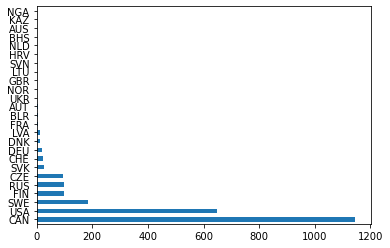

In [95]:
player_info['nationality'].value_counts().plot(kind='barh')

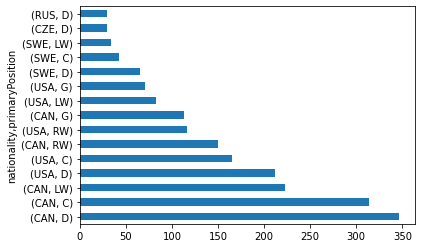

In [103]:
player_info.groupby(['nationality'])['primaryPosition'].value_counts().nlargest(15).plot(kind='barh')

In [110]:
game_skater_stats2 = game_skater_stats.drop_duplicates(subset=['player_id'])

In [121]:
game_skater_stats['player_id'].nunique()

1994

,game_id,team_name,golie_name,timeOnIce,assists,GF,pim,shots,saves,GA,powerPlaySaves,shortHandedSaves,evenSaves,shortHandedShotsAgainst,evenShotsAgainst,powerPlayShotsAgainst,savePercentage,powerPlaySavePercentage,evenStrengthSavePercentage,decision
0,2011030221,Devils,Martin Brodeur,3876,0,0,0,36,32,4,7,0,25,0,28,8,88.888889,87.5,89.285714,L
1,2011030221,Flyers,Ilya Bryzgalov,3876,0,0,0,26,23,3,4,5,14,5,16,5,88.461538,80.0,87.500000,W
2,2011030222,Devils,Martin Brodeur,3599,0,0,0,20,19,1,1,3,15,3,16,1,95.000000,100.0,93.750000,W
3,2011030222,Flyers,Ilya Bryzgalov,3559,0,0,0,34,31,3,6,0,25,0,28,6,91.176471,100.0,89.285714,L
4,2011030223,Flyers,Ilya Bryzgalov,4623,0,0,0,31,27,4,1,1,25,1,28,2,87.096774,50.0,89.285714,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24641,2018030415,Bruins,Tuukka Rask,3522,0,0,0,21,19,2,1,1,17,1,19,1,90.476190,100.0,89.473684,L
24642,2018030416,Bruins,Tuukka Rask,3600,0,0,0,29,28,1,12,1,15,1,16,12,96.551724,100.0,93.750000,W
24643,2018030416,Blues,Jordan Binnington,3487,0,0,0,31,27,4,3,1,23,1,26,4,87.096774,75.0,88.461538,L
24644,2018030417,Blues,Jordan Binnington,3600,0,0,0,33,32,1,3,0,29,0,30,3,96.969697,100.0,96.666667,W


In [123]:
game_plays = pd.read_csv("https://dl.dropbox.com/s/r34sk4632lphbcz/game_plays.csv?dl=0")


In [126]:
game_plays.columns

Index(['play_id', 'game_id', 'play_num', 'team_id_for', 'team_id_against',
       'event', 'secondaryType', 'x', 'y', 'period', 'periodType',
       'periodTime', 'periodTimeRemaining', 'dateTime', 'goals_away',
       'goals_home', 'description', 'st_x', 'st_y', 'rink_side'],
      dtype='object')

In [127]:
game_plays['event'].unique()

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Giveaway', 'Blocked Shot', 'Shot', 'Hit', 'Stoppage', 'Goal',
       'Penalty', 'Takeaway', 'Missed Shot', 'Period End',
       'Period Official', 'Game End', 'Game Official',
       'Official Challenge', 'Shootout Complete',
       'Early Intermission Start', 'Early Intermission End',
       'Emergency Goaltender'], dtype=object)

In [130]:
shots = game_plays[game_plays['event']=='Shot']

In [142]:
game_plays.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right
4,2011030221_5,2011030221,5,4.0,1.0,Giveaway,NaN,28.0,24.0,1,REGULAR,21,1179,2012-04-29 19:21:02,0,0,Giveaway by Kimmo Timonen,-28.0,-24.0,right


In [131]:
shots['secondaryType'].value_counts()

Wrist Shot     321525
Slap Shot      121324
Snap Shot       90437
Backhand        50843
Tip-In          26155
Deflected        8141
Wrap-around      7593
Name: secondaryType, dtype: int64

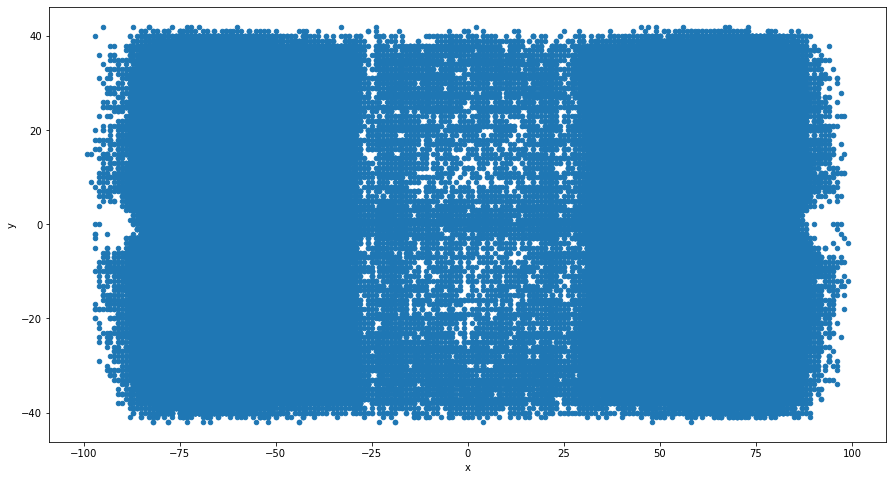

In [136]:
shots[shots['secondaryType']=='Wrist Shot'].plot.scatter(x='x', y='y', figsize=(15, 8))

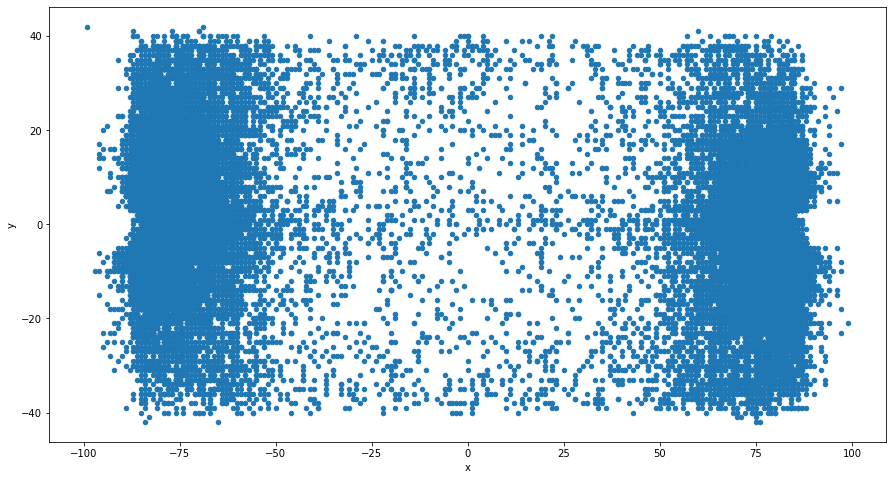

In [143]:
shots[shots['secondaryType']=='Backhand'].plot.scatter(x='x', y='y', figsize=(15, 8))

In [144]:
game_plays_player = pd.read_csv("https://dl.dropbox.com/s/9bafo0bjc1fs7wm/game_plays_players.csv?dl=0")

In [145]:
game_plays_player

,play_id,game_id,play_num,player_id,playerType
0,2011030221_4,2011030221,4,8476461,Winner
1,2011030221_4,2011030221,4,8460542,Loser
2,2011030221_5,2011030221,5,8459670,PlayerID
3,2011030221_6,2011030221,6,8470171,Blocker
4,2011030221_6,2011030221,6,8460542,Shooter
...,...,...,...,...,...
5340164,2018030417_296,2018030417,296,8471276,Winner
5340165,2018030417_296,2018030417,296,8475170,Loser
5340166,2018030417_297,2018030417,297,8476792,Hitter
5340167,2018030417_297,2018030417,297,8470257,Hittee
